In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv',sep =';') #import the CSV file(dataset)

In [3]:
df.head()     #display the first five rows & column of the dataset by default

,"Height,Weight"
0,"73.84701702,241.8935632"
1,"68.78190405,162.3104725"
2,"74.11010539,212.7408556"
3,"71.7309784,220.0424703"
4,"69.88179586,206.3498006"


In [4]:
df.tail()      #display the last five rows & column of the dataset by default

,"Height,Weight"
3496,"69.29682996,185.6490863"
3497,"70.54220142,210.1988449"
3498,"73.91254915,202.4299596"
3499,"67.39602078,144.2776711"
3500,"72.73897,187.2229089"


In [5]:
#df['Height']

In [6]:
df = pd.read_excel('Height-Weight Data.xlsx')       #import the excel file(dataset)

In [7]:
df.head()      # display the first five rows & column of the dataset by default

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
df.tail()     # displays the last five rows & column of the dataset by default

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [9]:
df.Height      #display the 1 column(height)

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [10]:
df.Weight   #display the 1 column(weight)

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [11]:
df.shape             # display the shape of the dataset

(3501, 2)

In [12]:
row ,col=df.shape   #display in row & column

In [13]:
row        #total row

3501

In [14]:
col       #total column

2

In [15]:
df[25:30] #specific num of rows(25-30)

,Height,Weight
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639


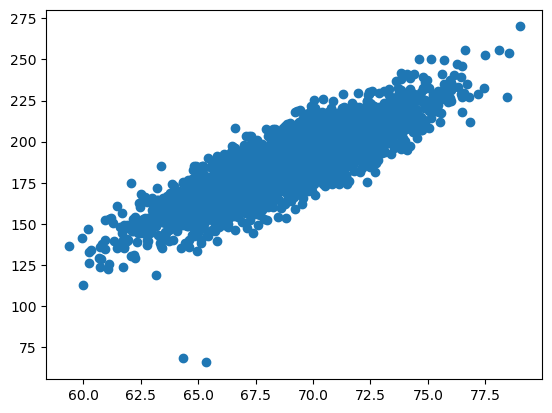

In [16]:
plt.scatter(df.Height, df.Weight) #visual representation of the dataset

Text(0.5, 1.0, 'Height-Weight Data')

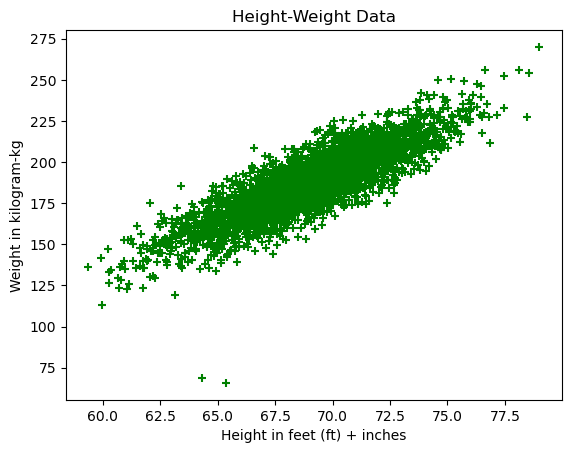

In [17]:
plt.scatter(df[['Height']], df[['Weight']] ,color='green',marker='+')#visual representation of the dataset(how two variables relate to each other & correlation between them )
plt.ylabel('Weight in kilogram-kg') #set label for the y-axis
plt.xlabel('Height in feet (ft) + inches') #set label for the x-axis
plt.title('Height-Weight Data') # add a title

In [18]:
df.Height.mean() #find mean value of the x-axis(height)

69.02441087268781

In [19]:
df.Weight.mean() #find mean value of the y-axis(weight)

186.891257979463

In [20]:
x=df[['Height']]#2d
y=df[['Weight']]

In [21]:
x=df.drop('Weight',axis=1) #axis=1 means column, 0 means row ,drop weight(y-axis)

In [22]:
x.head()  #display x-axis

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [23]:
y.head()  #display y-axis

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [24]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split as tts #from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=0.33,random_state=1)  #sperated the train & test data from dataset

In [26]:
xtrain.head() # display 5 x-axis train data

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [27]:
ytrain.head() # display 5 y-axis train data

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [28]:
xtest.head() # display 5 x-axis  test data

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [29]:
ytest.head()   # display 5 y-axis  test data

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression() # creating linear regression object

In [32]:
reg.fit(xtrain, ytrain)  #training model

LinearRegression()

In [33]:
reg.score(xtest,ytest)

0.7332431736613305

In [34]:
reg.predict([[73.847017]]) #predict the value

array([[215.41650651]])

In [35]:
m=reg.coef_   #Coefficient

In [36]:
c=reg.intercept_     # intercept

In [37]:
c

array([-223.73384719])

In [38]:
m

array([[5.9467582]])

In [39]:
predicted=(m*73.847017)+c   #y=m*x+c

In [40]:
predicted

array([[215.41650651]])

In [41]:
reg.predict(xtest) # ytest results

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [42]:
df2=df.copy() #copy df to df2

In [43]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [44]:
df2['predicted']=reg.predict(df[['Height']]) #show the predicted weight)

In [45]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


# Best fit Line

Text(0.5, 1.0, 'Height-Weight Data')

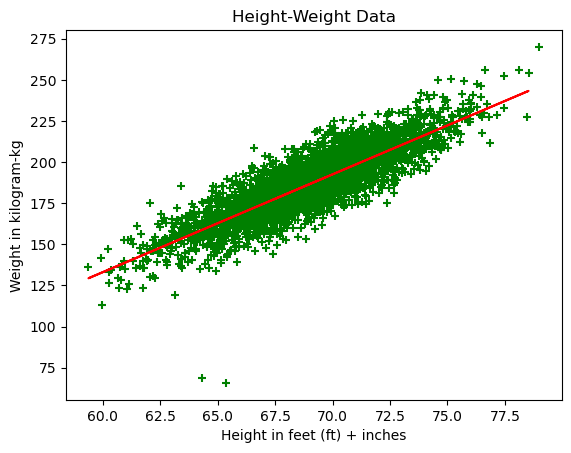

In [46]:
plt.scatter(df[['Height']], df[['Weight']], color='green', marker='+') #draw best fit line using xtest data
plt.plot(xtest,reg.predict(xtest), color='red') #reg.predict(xtest)=m*test+c
plt.ylabel('Weight in kilogram-kg') #set label for the y-axis
plt.xlabel('Height in feet (ft) + inches')#set label for the x-axis
plt.title('Height-Weight Data') # add a title

Text(0.5, 1.0, 'Height-Weight Data')

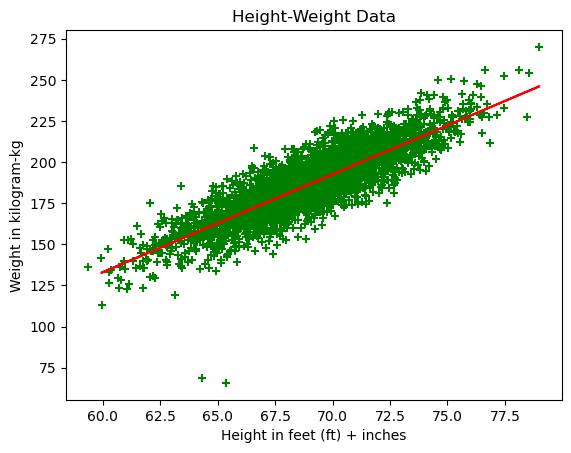

In [47]:
plt.scatter(df[['Height']],df[['Weight']],color='green',marker='+')
plt.plot(xtrain,reg.predict(xtrain),color='red')
plt.ylabel('Weight in kilogram-kg')
plt.xlabel('Height in feet (ft) + inches')
plt.title('Height-Weight Data')

In [48]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error # from sklearn.metrics import mean_squared_error ,mean_absolute_error 

In [49]:
#testing MSE
test_mse=mean_squared_error(ytest,reg.predict(xtest)) #ytest is actual  y, reg.predict(xtest) is actually predicted y
test_mse

111.14654406073984

In [50]:
#testing MAE
test_mse= mean_absolute_error(ytest,reg.predict(xtest))
test_mse

8.29430074943638

In [51]:
#training MSE
train_mse= mean_squared_error(ytrain,reg.predict(xtrain))
train_mse

103.48759292384861

In [52]:
#training MAE
train_mse= mean_absolute_error(ytrain,reg.predict(xtrain))
train_mse

7.9554884524224185